In [1]:
from LSTMBayesianOptimizer import BayesianLSTMOptimizer, LSTMModel
from Evaluate import Evaluate
from Financialdataprocessing import DataProcessor
from Visualize import Visualizer
import yfinance as yf
from transformer import TransformerModel, BayesianTransformerOptimizer


zsh:1: command not found: pip


In [2]:
data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
financial_data_processor = DataProcessor(data)
X_train, y_train, X_test, y_test = financial_data_processor.X_train, financial_data_processor.y_train, financial_data_processor.X_test, financial_data_processor.y_test

X_train.shape

[*********************100%%**********************]  1 of 1 completed


/Users/cankus/Documents/3.Semester/Master_Projeckt/main/def_funktionen.py:259: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr_f.fillna(corr_f[19],inplace=True)
/Users/cankus/Documents/3.Semester/Master_Projeckt/main/def_funktionen.py:260: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr_s.fillna(corr_s[39],inplace=True)
/Users/cankus/Documents/3.Semester/Master_Projeckt/main/def_funktionen.py:274: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

(1934, 30, 15)

In [3]:

transformer_optimizer=BayesianTransformerOptimizer(X_train,y_train)
transformer_optimizer.optimize()
transformer_optimizer.best_hps

Reloading Tuner from bayesian_optimization/transformerneu/tuner0.json


In [4]:
# Kullanım örneği:
bayesian_optimizer = BayesianLSTMOptimizer(X_train, y_train, 30)
bayesian_optimizer.optimize()
# En iyi hiperparametreleri ve modeli kullanma:
best_hps = bayesian_optimizer.best_hps



Reloading Tuner from bayesian_optimization/lstm132/tuner0.json


In [5]:
best_hps.values



{'units': 100, 'activation': 'tanh', 'learning_rate': 0.004511709522511237}

In [6]:
lstm=LSTMModel((30,15),best_hps.values['units'],best_hps.values['learning_rate'],best_hps.values['activation'])
lstm.train_model(X_train, y_train)
lstmmodel=lstm.model


Epoch 1/30
116/116 [==============================] - 1s 7ms/step - loss: 0.0948 - val_loss: 0.0867
Epoch 2/30
116/116 [==============================] - 1s 5ms/step - loss: 0.0608 - val_loss: 0.0739
Epoch 3/30
116/116 [==============================] - 1s 5ms/step - loss: 0.0582 - val_loss: 0.0825
Epoch 4/30
116/116 [==============================] - 1s 5ms/step - loss: 0.0553 - val_loss: 0.0726
Epoch 5/30
116/116 [==============================] - 1s 5ms/step - loss: 0.0521 - val_loss: 0.0757
Epoch 6/30
116/116 [==============================] - 1s 5ms/step - loss: 0.0539 - val_loss: 0.0706
Epoch 7/30
116/116 [==============================] - 1s 5ms/step - loss: 0.0546 - val_loss: 0.0825
Epoch 8/30
116/116 [==============================] - 1s 5ms/step - loss: 0.0587 - val_loss: 0.0747
Epoch 9/30
116/116 [==============================] - 1s 5ms/step - loss: 0.0537 - val_loss: 0.0814
Epoch 10/30
116/116 [==============================] - 1s 5ms/step - loss: 0.0538 - val_loss: 0.0737

In [7]:
y_pred=lstmmodel.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])


16/16 [==============================] - 0s 3ms/step
[0.98023945] [1.]
[0.98489124] [1.]
[0.98612463] [1.]
[0.9836742] [1.]
[0.9839716] [1.]
[0.9694822] [1.]
[0.9821911] [1.]
[0.98089707] [1.]
[0.9783337] [1.]
[0.9824332] [1.]


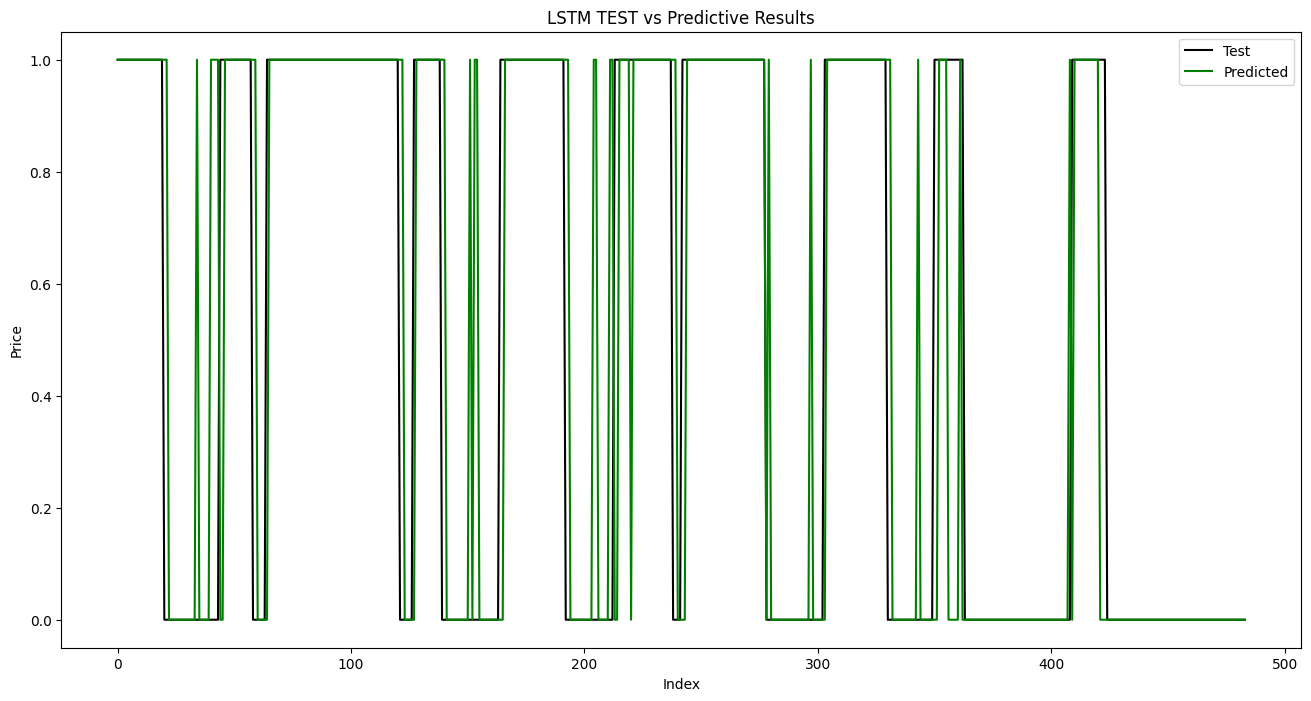

In [8]:
import numpy as np
visualizer = Visualizer(y_test, np.round(y_pred),'LSTM TEST vs Predictive Results')
visualizer.plot_results()

In [9]:
values=transformer_optimizer.best_hps.values
values

{'num_trans_blocks': 3,
 'epsilon': 2.3313691187786162e-08,
 'head_size': 192,
 'num_heads': 2,
 'dropout': 0.30000000000000004,
 'attention_axes': 1,
 'ff_dim': 1,
 'kernel_size': 1,
 'mlp_units': 128,
 'mlp_dropout': 0.4,
 'learning_rate': 0.0003243806953412315}

In [10]:
# TransformerModel-Klasse erstellen
transformer_model = TransformerModel(head_size=values['head_size'], num_heads=values['num_heads'], ff_dim=values['ff_dim'], num_trans_blocks=4, mlp_units=[values['mlp_units']], mlp_dropout=values['mlp_dropout'], dropout=values['dropout'], attention_axes=1)

# Build and train the model
transformer_model.compile_and_fit(X_train, y_train)

Epoch 1/30
129/129 [==============================] - 4s 14ms/step - loss: 0.2035 - mae: 0.3763
Epoch 2/30
129/129 [==============================] - 2s 16ms/step - loss: 0.1492 - mae: 0.3082
Epoch 3/30
129/129 [==============================] - 2s 16ms/step - loss: 0.1341 - mae: 0.2910
Epoch 4/30
129/129 [==============================] - 2s 17ms/step - loss: 0.1164 - mae: 0.2638
Epoch 5/30
129/129 [==============================] - 2s 18ms/step - loss: 0.1001 - mae: 0.2399
Epoch 6/30
129/129 [==============================] - 2s 17ms/step - loss: 0.0957 - mae: 0.2340
Epoch 7/30
129/129 [==============================] - 2s 17ms/step - loss: 0.0917 - mae: 0.2240
Epoch 8/30
129/129 [==============================] - 2s 17ms/step - loss: 0.0944 - mae: 0.2253
Epoch 9/30
129/129 [==============================] - 2s 18ms/step - loss: 0.0831 - mae: 0.2118
Epoch 10/30
129/129 [==============================] - 2s 18ms/step - loss: 0.0827 - mae: 0.2065
Epoch 11/30
129/129 [==================

In [11]:
y_pred_Trans=transformer_model.model.predict(X_test)
for i in range(10):
    print(y_pred_Trans[i], y_test[i])

16/16 [==============================] - 0s 15ms/step
[0.9075617] [1.]
[0.8834183] [1.]
[0.891393] [1.]
[0.8654875] [1.]
[0.8424305] [1.]
[0.8027558] [1.]
[0.78474134] [1.]
[0.7688538] [1.]
[0.7736641] [1.]
[0.7508346] [1.]


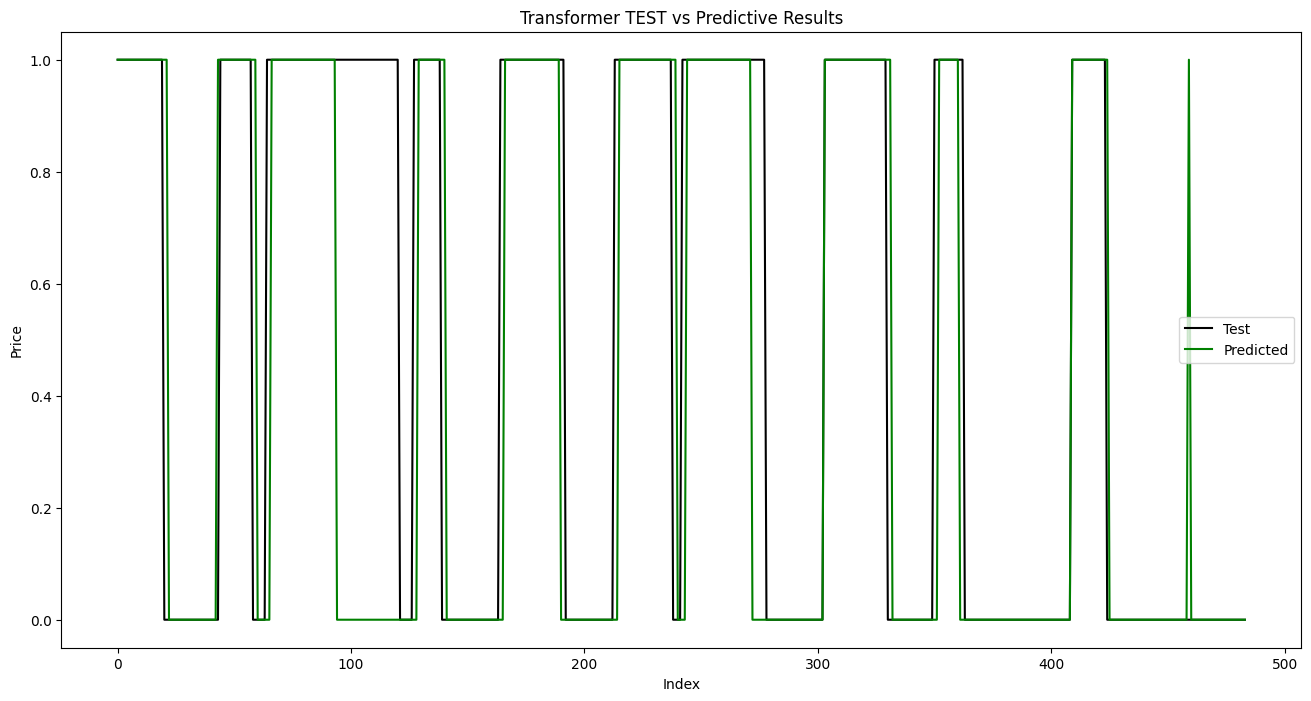

In [12]:
visualizer2 = Visualizer(y_test, np.round(y_pred_Trans),'Transformer TEST vs Predictive Results')
visualizer2.plot_results()

In [13]:
evaluate=Evaluate(y_test,y_pred_Trans)
print(evaluate.compare_var)
print(evaluate.evaluate_model_with_mape)


<bound method Evaluate.compare_var of <Evaluate.Evaluate object at 0x2981b52d0>>
<bound method Evaluate.evaluate_model_with_mape of <Evaluate.Evaluate object at 0x2981b52d0>>
